In [23]:
import config
from bs4 import BeautifulSoup as BS
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
import time
import re

In [2]:
df = pd.read_csv('test.csv', index_col=0)

In [3]:
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


In [7]:
df.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
dtype: int64

In [8]:
df.category.value_counts()

dress         92884
gown          44381
sheath        19316
shift          5365
jumpsuit       5184
              ...  
caftan            4
sweatpants        2
overcoat          2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

In [12]:
df.category.unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [15]:
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


In [16]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age'],
      dtype='object')

In [19]:
df = df.rename(columns={'bust size': 'bust_size', 'rented for': 'rented_for', 'body type': 'body_type'})

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


In [22]:
df.bust_size.value_counts()

34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
44h        1
28i        1
28h        1
42j        1
42h        1
Name: bust_size, Length: 106, dtype: int64

In [26]:
re.split('(\D+)', '34b')

['34', 'b', '']

In [30]:
df['bust_size'] = df['bust_size'].str.split('(\D+)')

In [31]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age
0,fit,420272,"[34, d, ]",2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,273551,"[34, b, ]",153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,909926,"[34, c, ]",126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,151944,"[34, b, ]",616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


In [32]:
df['cup_size'] = df.bust_size.str[1]

In [34]:
df['bust_size'] = df.bust_size.str[0]

In [66]:
#df = df.dropna()

In [68]:
condition = df['height'] != 'nan'

In [71]:
df = df[condition]

In [72]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_

#print df["HeightNoShoes"].apply(lambda x:parse_ht(x))

In [58]:
parse_ht("5' 8")

5' 8


68.0

In [44]:
df['height'] = df['height'].astype(str)

In [47]:
df['height'] = df['height'].str.split('"')

In [52]:
df['height'] = df['height'].apply(lambda x:x[0])

In [55]:
df.height[0]

"5' 8"

In [74]:
df['height'] = df['height'].apply(lambda x:parse_ht(x))

In [77]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,cup_size
0,fit,420272,34,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,d
1,fit,273551,34,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,b
3,fit,909926,34,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,c
4,fit,151944,34,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,b
5,fit,734848,32,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,b


In [78]:
df.to_csv(r'/Users/andrewtriola/Documents/flatiron/mod_6_proj/mod_6_project/updated_df.csv')

In [79]:
corr_df = df.corr()

In [83]:
df['rating'].value_counts()

10.0    94196
8.0     40671
6.0      8309
4.0      2183
2.0       778
Name: rating, dtype: int64

(array([3.6000e+01, 2.2100e+02, 9.5630e+03, 2.9188e+04, 3.9974e+04,
        4.9817e+04, 1.3666e+04, 3.5370e+03, 1.2000e+02, 1.5000e+01]),
 array([54. , 56.4, 58.8, 61.2, 63.6, 66. , 68.4, 70.8, 73.2, 75.6, 78. ]),
 <a list of 10 Patch objects>)

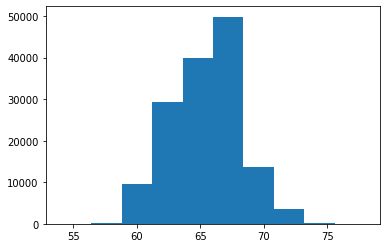

In [85]:
plt.hist(df['height'], bins=10)

In [86]:
df['weight']

0         137lbs
1         132lbs
3         135lbs
4         145lbs
5         138lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 146137, dtype: object

In [90]:
abc = re.split('\D+', '137lbs')[0]

In [91]:
abc

'137'

In [94]:
df['weight'] = df['weight'].str.split('\D+')

In [96]:
df['weight'] = df['weight'].apply(lambda x:x[0])

In [100]:
df['weight'] = df['weight'].astype('int32')

In [102]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,cup_size
0,fit,420272,34,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,d
1,fit,273551,34,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,b
3,fit,909926,34,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,c
4,fit,151944,34,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,b
5,fit,734848,32,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,b


In [103]:
df.to_csv(r'/Users/andrewtriola/Documents/flatiron/mod_6_proj/mod_6_project/updated_df.csv')

(array([7.0000e+00, 6.4600e+02, 3.6953e+04, 7.2448e+04, 2.7124e+04,
        6.3620e+03, 1.8880e+03, 4.7500e+02, 2.0500e+02, 2.9000e+01]),
 array([ 50.,  75., 100., 125., 150., 175., 200., 225., 250., 275., 300.]),
 <a list of 10 Patch objects>)

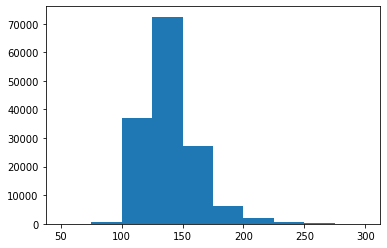

In [104]:
plt.hist(df['weight'], bins=10)